### Seaborn 시각화  I

In [1]:
#!pip install seaborn
#!pip install matplotlib

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')           # 성가신 warning은 off 해준다. 

In [3]:
# 내장 데이터를 불러옴.
dat = sns.load_dataset('mpg')
dat.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [4]:
dat.shape

(398, 9)

### 1. 히스토그램 , Rug , KDE

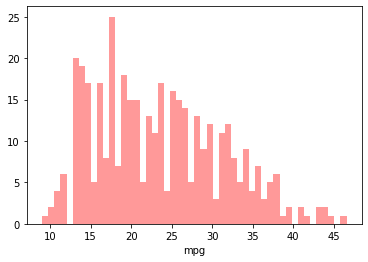

In [5]:
# 히스토그램
sns.distplot(dat.mpg, kde=False, rug=False, bins=50, color='red')
plt.show()           

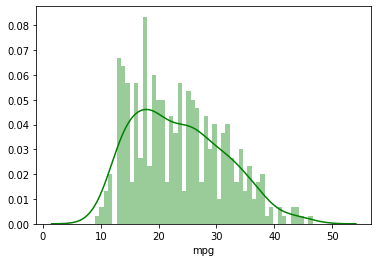

In [6]:
# 히스토그램 + KDE(곡선)
sns.distplot(dat.mpg, kde=True, rug=False, bins=50, color='green')
plt.show()

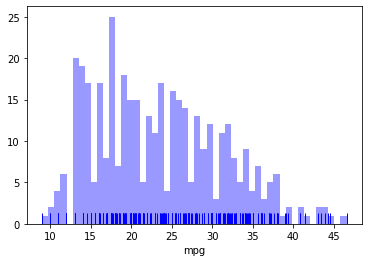

In [7]:
# 히스토그램 + Rug(도수를 선으로 표현)
sns.distplot(dat.mpg, kde=False, rug=True, bins=50, color='blue')
plt.show()

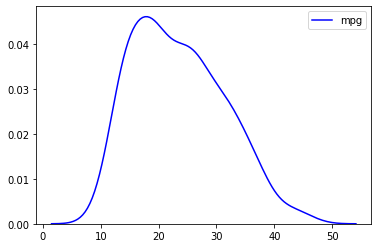

In [8]:
# KDE(곡선)
sns.kdeplot(dat.mpg, color='blue')
plt.show()

### 2. 산점도, 산점도 + 회귀선, Hex 

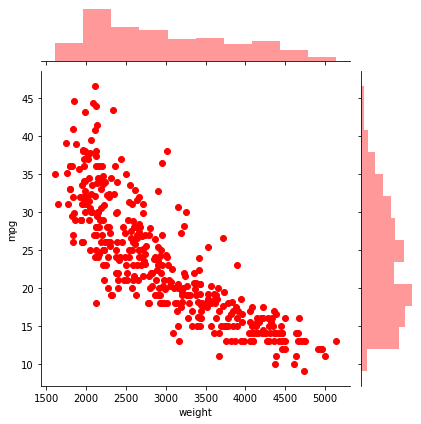

In [9]:
# 산점도 (kind='scatter')
sns.jointplot(x='weight', y='mpg', data=dat, color='red', kind='scatter')
plt.show()

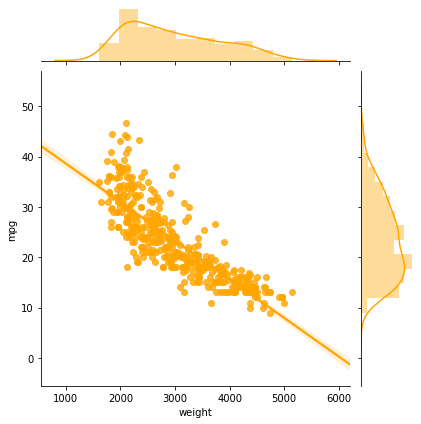

In [10]:
# 산점도 + 회귀선 ( kind='reg')
sns.jointplot(x='weight', y='mpg', data=dat, color='orange', kind='reg')
plt.show()                                                  

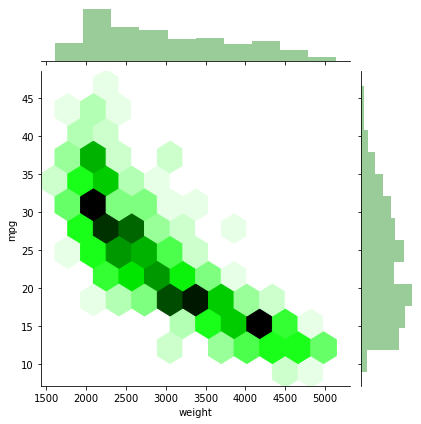

In [11]:
# Hex(육각형으로 표시)
sns.jointplot(x='weight', y='mpg', data=dat, color='green', kind='hex')
plt.show()                                      

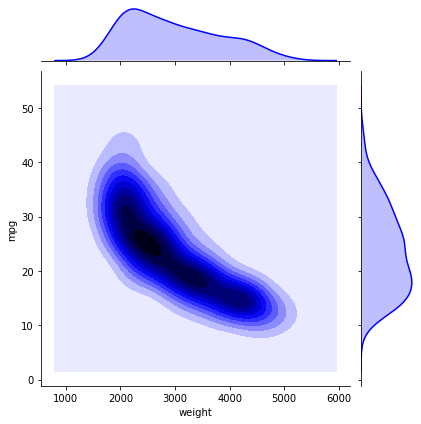

In [12]:
# KDE(1차원이면 선, 2차원이면 등고선)
sns.jointplot(x='weight', y='mpg', data=dat, color='blue', kind='kde')
plt.show()                                               

### 3. 막대 그림 (bar plot)

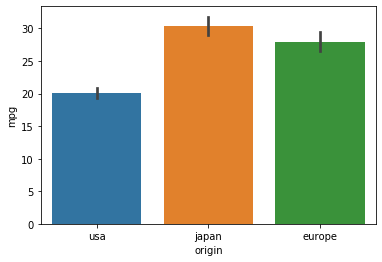

In [13]:
# 명목형 변수의 유형별 그룹지어서 연속형 변수의 평균을 구함.
sns.barplot(x='origin',y='mpg',data=dat)
plt.show()

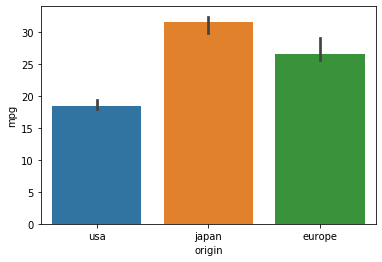

In [14]:
# 명목형 변수의 유형별 그룹지어서 연속형 변수의 중위수을 구함.
# estimator 에 통계 함수를 인자값으로 줄 수 있다. 
sns.barplot(x='origin',y='mpg',data=dat,estimator=np.median)
plt.show()

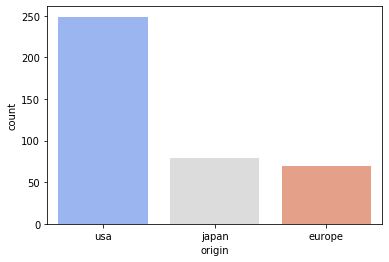

In [15]:
# 도수분포표를 막대그림으로 나타냄.
# 인자 x만 필요함.
sns.countplot(x='origin', data=dat, palette='coolwarm')
plt.show()

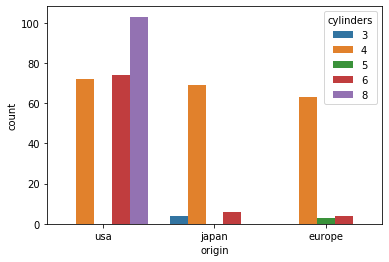

In [16]:
# 도수분포표를 막대그림으로 나타냄.
# 또다른 변수를 인자 hue의 값으로 포함.
sns.countplot(x='origin', data=dat, hue='cylinders')
plt.show()                          #실린더처럼 세운다

### 4. 상자 그림 (box plot)

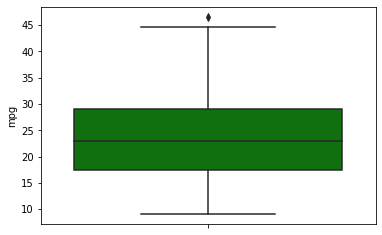

In [17]:
# 세로 방향 상자그림.
sns.boxplot(y='mpg', data=dat, color='green')
plt.show()

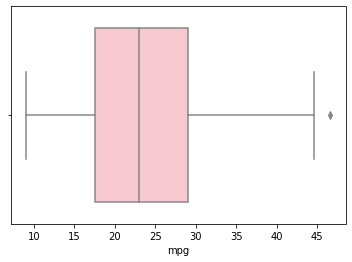

In [18]:
# 가로 방향 상자그림.
sns.boxplot(x='mpg', data=dat, color='pink')
plt.show()

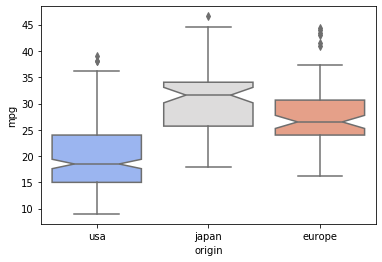

In [19]:
# 다중 상자그림.
sns.boxplot(x='origin', y='mpg', data=dat, palette='coolwarm', notch=True)
plt.show()                                                     #허리 들어가게

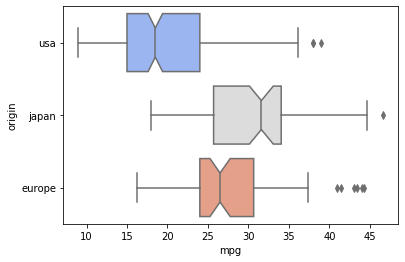

In [20]:
# 다중 상자그림.
sns.boxplot(x='mpg', y='origin', data=dat, palette='coolwarm', notch=True)
plt.show() #x,y위치바꾸면 가로로 출력                         #허리 들어가게                                      

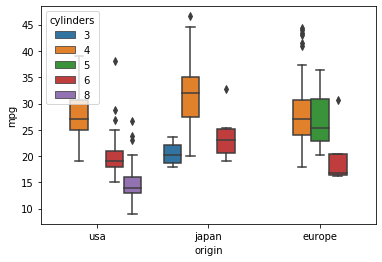

In [21]:
# 다중 상자그림.
# 인자 hue의 값으로 또 다른 변수 포함.
sns.boxplot(x='origin', y='mpg', data=dat, hue='cylinders')
plt.show()                                 #또다른 명목형변수 넣을 때(색깔별로 쪼갬)

### 5. 바이올린 그림 (violin plot)

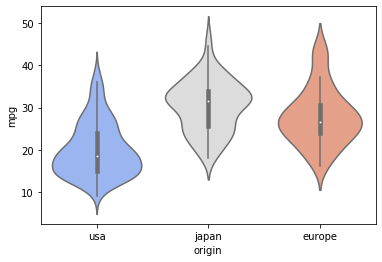

In [22]:
# 다중 바이올린 그림.
# boxplot과 인자가 같음.
sns.violinplot(x='origin', y='mpg', data=dat, palette='coolwarm')
plt.show()

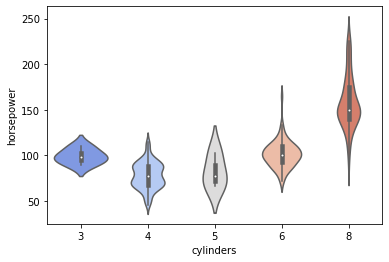

In [23]:
# 다중 바이올린 그림.
# boxplot과 인자가 같음.
sns.violinplot(x='cylinders', y='horsepower', data=dat, palette='coolwarm')
plt.show()

### 6. 유사유형 그래프

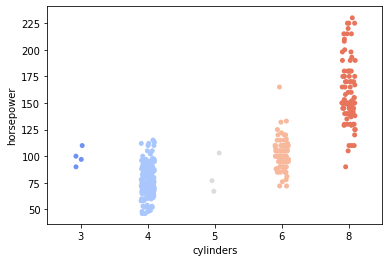

In [24]:
#Strip plot
sns.stripplot(x='cylinders', y='horsepower', data=dat, palette='coolwarm')
plt.show()

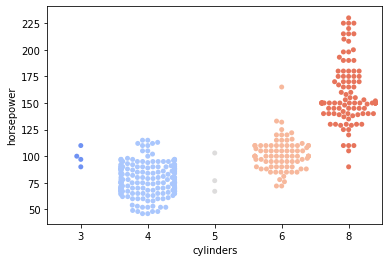

In [25]:
#Swarm plot
sns.swarmplot(x='cylinders', y='horsepower', data=dat, palette='coolwarm')
plt.show()

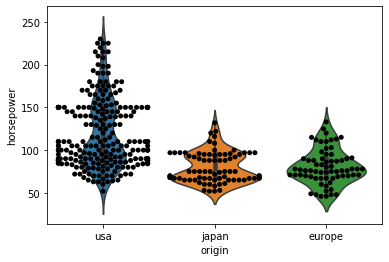

In [26]:
# Violin plot + Smarm plot.
sns.violinplot(x='origin', y='horsepower', data=dat)
sns.swarmplot(x='origin', y='horsepower', data=dat, color='black')
plt.show()

### 명목형변수 1개-도수분포표
- 시리즈.value_counts()
- df.gender.value_counts()



### 명목형변수 2개-분할표
- pd.crosstab(시리즈1, 시리즈2)
- df.crosstab(df.gender, df.bloodtype)